In [1]:
from nptRepr import CNOT,H,X,Y,Z,plot_nqbit_prob, init_state, apply_one_qubit_gate, apply_two_qubit_gate
import numpy as np

In [2]:
state=init_state(2)
state=apply_one_qubit_gate(state,H(),0)
state=apply_two_qubit_gate(state,CNOT(),0,1)
print(state)

ba,abcd->cbdcba


ValueError: einstein sum subscripts string includes output subscript 'c' multiple times

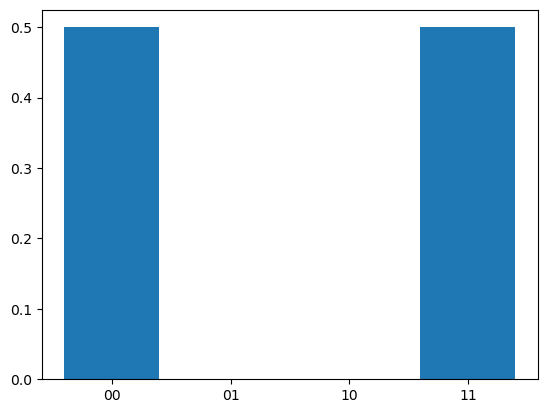

In [11]:
plot_nqbit_prob(state)

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

{'00': 0.5, '01': 0.5}


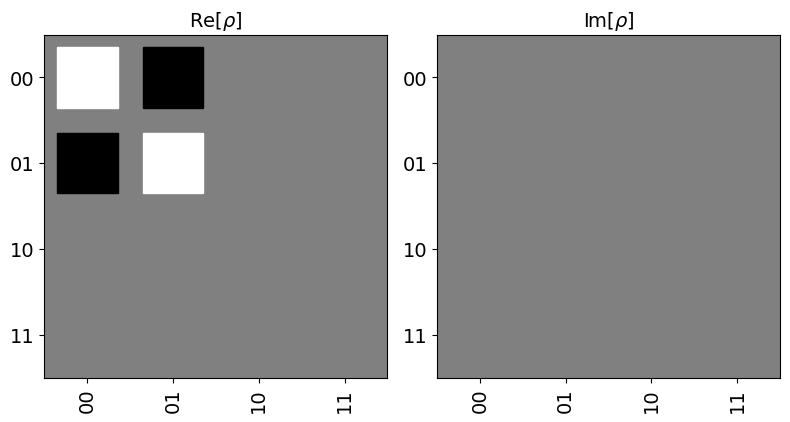

In [9]:
circ = QuantumCircuit(2)
circ.h(0)
circ.y(0)
circ.save_statevector()

# Transpile for simulator
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()
statevector = result.get_statevector(circ)
probs=statevector.probabilities_dict(decimals=2)
print(probs)
statevector.draw(output="hinton")
# plot_histogram(statevector, title='Bell state')


In [1]:
import numpy as np
from scipy.linalg import svd

def create_bell_state():
    """Creates the state vector for the Bell state |00> + |11>"""
    state = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
    return state

def svd_decompose(state_vector, num_qubits):
    """Decomposes the state vector into MPS tensors using SVD"""
    mps_tensors = []
    
    # Reshape state vector for the first SVD (split first qubit from the rest)
    dim = 2 ** (num_qubits - 1)
    state_matrix = state_vector.reshape(2, dim)
    
    for i in range(num_qubits - 1):
        # Perform SVD
        U, S, Vh = svd(state_matrix, full_matrices=False)
        
        # Store the U matrix (as the MPS tensor for the current qubit)
        A = U
        mps_tensors.append(A)
        
        # Store the singular values (bond dimension)
        Lambda = np.diag(S)
        mps_tensors.append(Lambda)
        
        # Reshape Vh for the next iteration
        state_matrix = Vh.reshape(2, -1)
    
    # The final Vh matrix is the last MPS tensor
    mps_tensors.append(state_matrix)
    
    return mps_tensors

def print_mps(mps_tensors):
    """Prints the MPS tensors"""
    for i, tensor in enumerate(mps_tensors):
        print(f"Tensor {i + 1}:\n{tensor}\n")

# Main function to create and decompose the Bell state
num_qubits = 2
bell_state = create_bell_state()

# Decompose the Bell state into MPS form
mps_tensors = svd_decompose(bell_state, num_qubits)

# Print the resulting MPS tensors
print_mps(mps_tensors)


Tensor 1:
[[1. 0.]
 [0. 1.]]

Tensor 2:
[[0.70710678 0.        ]
 [0.         0.70710678]]

Tensor 3:
[[0.70710678 0.        ]
 [0.         0.70710678]]

